# **Proyecto 2  : Predecir la calidad del Vino**
---

En el presente informe se evalua la calidad del vino portugués "Vinho Verde" utilizando datos sobre sus propiedades físicas y químicas. El objetivo principal es crear modelos que puedan predecir la calidad del vino basándose en estas características. Esto sera útil tanto para los productores como para los consumidores. Las propiedades del vino, como el contenido de alcohol o la acidez, son cruciales para determinar su calidad y cómo lo percibimos. Para lograrlo, utilizaremos una base de datos con información detallada sobre estas características y la calidad del vino. Luego, emplearemos técnicas matemáticas para crear modelos predictivos. Además, exploraremos información adicional sobre el "Vinho Verde" para comprender mejor su importancia en la industria vinícola. En resumen, este proyecto busca predecir la calidad del vino "Vinho Verde" utilizando datos sobre sus propiedades, lo que beneficiará a productores y consumidores.

se realiza una exploración de la base de datos de Credito Dias desarrollada por una empresa de telecomunicaciones en la que tiene el registro de 10 mil clientes relacionados con la compañía. Para esto se hace una exploración inicial de los datos, se describen las variables y se hacen análisis de estas de manera independiente y también correlacinandolas para entender patrones de los datos.

En el presente informe se responde a las siguientes preguntas:

- ¿Qué tipo de variables existen?
- ¿Existen registros nulos?
- ¿Cuales caracteristicas tienen mayor relación con la calidad del vino?

### Equipo de trabajo

- Marcela Vásquez
- Omar Avendaño
- Duván Robayo


En la siguiente celda se importan las librerías necesarias para el análisis de datos y la construcción de modelos de aprendizaje automático: **pandas, numpy, matplotlib, seaborn y sci-kit learn**.

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import statsmodels as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import OLS

## **0.  Leer el archivo de datos**
---

Vamos a utilizar el dataset winequality-red.csv que se encuentra en un repositorio en línea y lo cargaremos en el dataframe data.

In [142]:
#OPCION 1 CARGAMOS EL DATASET DESDE EL ARCHIVO EN LA WEB
#1 Usamos el método read_csv que permite leer archivos csv como un dataframe de pandas.

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, sep=";")

In [143]:
#Si desea guardar el archivo en local puede ejecutar este código:

data.to_csv("wineQuality.csv", index= False)

In [144]:
#OPCION 2 CARGAMOS EL DATASET DESDE EL ARCHIVO LOCAL
#1 Usamos el método read_csv que permite leer archivos csv como un dataframe de pandas.

data = pd.read_csv("wineQuality.csv")

In [145]:
# REVISIÓN PREVIA DE LOS DATOS
# Revisamos los datos cargados con solo las tres primeras filas usando .head().

data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [146]:
# REVISIÓN PREVIA DE LOS DATOS
# Revisamos los datos cargados con solo las tres últimas filas, usando tail(), esto con el fin de revisar previamente la variabilidad de los datos

data.tail(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## **1. Tipos de variables**
---
En esta sección haremos una revisión de las variables existentes en el dataframe y una descripción detallada de cada una de las columnas.

In [147]:
# REVISIÓN DE LA FORMA DEL DATAFRAME (CANTIDAD DE FILAS Y CANTIDAD DE COLUMNAS)
# Vamos a revisar el número de filas y columnas del dataframe, para saber con qué cantidad de información contamos.
# Usamos el método .shape

print(f"El número de filas del dataset es de: {data.shape[0]}")
print(f"El número de columnas del dataset es de: {data.shape[1]}")

El número de filas del dataset es de: 1599
El número de columnas del dataset es de: 12


### **1.1.  Tipos de datos de las columnas y registros nulos**

Se identifica las columnas, se hace una revisión de la cantidad de datos no nulos y el tipo de dato por cada columna.

In [148]:
# REVISIÓN GENERAL DEL DATAFRAME
# Este metodo permite mostrar información sobre las columnas y sus tipos de datos, así como un conteo de los valores no nulos.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Determinamos la cantidad de variables y registros. Y el tipo de variables si son numericas o cualitativas

In [149]:
num_variables = len(data.columns)
num_registros = len(data)

numericas = data.select_dtypes(include='number').columns.tolist()
cualitativas = data.select_dtypes(exclude='number').columns.tolist()

print("Cantidad de variables:", num_variables)
print("Cantidad de registros:", num_registros)
print("Variables numéricas:", numericas)
print("Variables cualitativas:", cualitativas)

Cantidad de variables: 12
Cantidad de registros: 1599
Variables numéricas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Variables cualitativas: []


**Notas:**
- Se evidencian dos tipos de datos (float, Integer)
- Se observa todas las variables están completas al no tener registros nulos, de los 1599 registros, todas las variables cuentan con datos válidos.
- Preliminarmente se puede observar que todas las variables son numéricas.

### **1.2.  Revisión estadística de las variables numéricas**

Se identifican las columnas numéricas, identificando por cada variable el promedio, la desviación estándar, los percentiles y valrores mínimos y máximos.

In [150]:
# DESCRIPCIÓN ESTADÍSTICA DE LOS DATOS NUMÉRICOS
# El método describe nos permite traer varias medidas como: Conteo, Promedio, Desviación Estándar, Percentiles, valor mínimo y valor máximo.

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Notas:**
- Se evidencia que en promedio la calidad del vino estaría en 5.63 en un rango entre 3 y 8 puntos en los que se mide la calidad.
- Se observa que el promedio de ph de un vino o nivel de acidez es de 3.31, similar a la acidez de un jugo de naranja.

### **1.3.  Diccionario de datos**

Se describen cada una de las columnas presentes en este dataframe, proponiendo un nuevo nombre, la definición de estas variables, los valores ejemplo que toman los campos de estas columnas, los tipos de datos y tipos de variable.

El conjunto de datos de data cuenta con las siguientes variables:

| Variable             | Nuevo Nombre       | Definición	                                                                                                                                                                         | Valores       | Tipo de Dato en Python | Tipo de Variable   |
|:--------------------:|:------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-------------:|:----------------------:|:------------------:|
| fixed acidity        | AcidezFija         | Cantidad de ácidos no volátiles presentes en el vino (ácido tartárico), expresada en gramos por litro.                                | 7.2 , ...     | Float                  | Numérica(continua) |
| volatile acidity     | AcidezVolatil      | Cantidad de ácidos volátiles presentes en el vino (ácido acético), expresada en gramos por litro.                                | 0.6 , ...     | Float                  | Numérica(continua) |
| citric Acid          | AcidoCitrico       | Cantidad de ácido orgánico relacionado con la frescura y el sabor cítrico, expresado en gramos por litro.                                | 0.49 , ...    | Float                  | Numérica(continua) |
| residual sugar       | AzucarResidual     | Cantidad de azúcar que permanece en el vino después de la fermentación, expresado en gramos por litro.                                | 2.0, ...      | Float                  | Numérica(continua) |
| chlorides            | Cloruro            | Cantidad de cloruro de sodio presente en el vino expresado en gramos por litro.                                | 0.074 , ...   | Float                  | Numérica(continua) |
| free sulfur dioxide  | DioxidoAzufreLibre | Cantidad de dióxido de azufre(conservante) que no está unido a otras moléculas del vino, expresado en partes por millón.                 | 6.0  , ...    | Float                  | Numérica(continua) |
| total sulfur dioxide | TotalDioxidoAzufre | Suma de dióxido de azufre libre y dióxido de azufre unido a otras moléculas en el vino, expresado en partes por millón.                 | 28.0 , ...    | Float                  | Numérica(continua) |
| density              | Densidad           | Densidad del vino relacionada con su contenido de alcohol y azúcar, expresado en gramos por centímetro cúbico.                    | 0.99720 , ... | Float                  | Numérica(continua) |
| pH                   | pH                 | Es una medida de la acidez o alcalinidad del vino en una escala de 0 a 14./ 7 = Neutro / <7 = Mayor Acidez / >7 = Mayor Alcalinidad | 3.30 , ...    | Float                  | Numérica(continua) |
| sulphates            | Sulfato            | Cantidad de ésteres que contribuyen al aroma, sabor y estabilidad del vino. Expresado en gramos por litro.                            | 0.60 , ...    | Float                  | Numérica(continua) |
| alcohol              | Alcohol            | Porcentaje de alcohol en volumen del vino. Expresados sus valores en %/vol                                   | 9.23 , ...    | Float                  | Numérica(continua) |
| **quality**          | **Calidad**        | **Medida de la calidad del vino de acuerdo a las calificaciones otorgadas por expertos en el área**                                | 5 , ...       | Integer                | Numérica(discreta) |


### **1.4.  Cambios en columnas**

A continuación se realizan algunos ajustes al dataset con el fin de facilitar las operaciones.

In [151]:
# SIMPLIFACAMOS LOS NOMBRES DE COLUMNAS
# Antes de operar vamos a normalizar los nombres de las columnas para hacer las operaciones más sencillas y entender mejor las variables que estamos manejando.

data.rename(columns={"fixed acidity":"AcidezFija","volatile acidity":"AcidezVolatil","citric acid":"Acido Citrico",
                            "residual sugar":"AzucarResidual", "chlorides": "Cloruro", "free sulfur dioxide": "DioxidoAzufreLibre",
                            "total sulfur dioxide":"TotalDioxidoAzufre", "density": "Densidad", "pH": "PH", "sulphates": "Sulfato",
                            "alcohol": "Alcohol", "quality": "Calidad"}, inplace=True)

## **2. Análisis Exploratorio de Datos**
---
En esta sección haremos una comparación de cada una de las variables de este dataset, para identificar comportamientos en los datos y tendencias de los mismos por medio de gráficos que nos permitan evaluar las variables numéricas.

In [152]:
color1 = "#363432"
color2 = "#196774"
color3 = "#90A19D"
color4 = "#F0941F"
color5 = "#EF6024"
colores = [color1, color2, color3, color4, color5]

### **2.1.  Distribución de los datos**

A continuación generamos un lienzo con los histrogramas de frecuencias de cada una de las variables presentes en el dataframe.

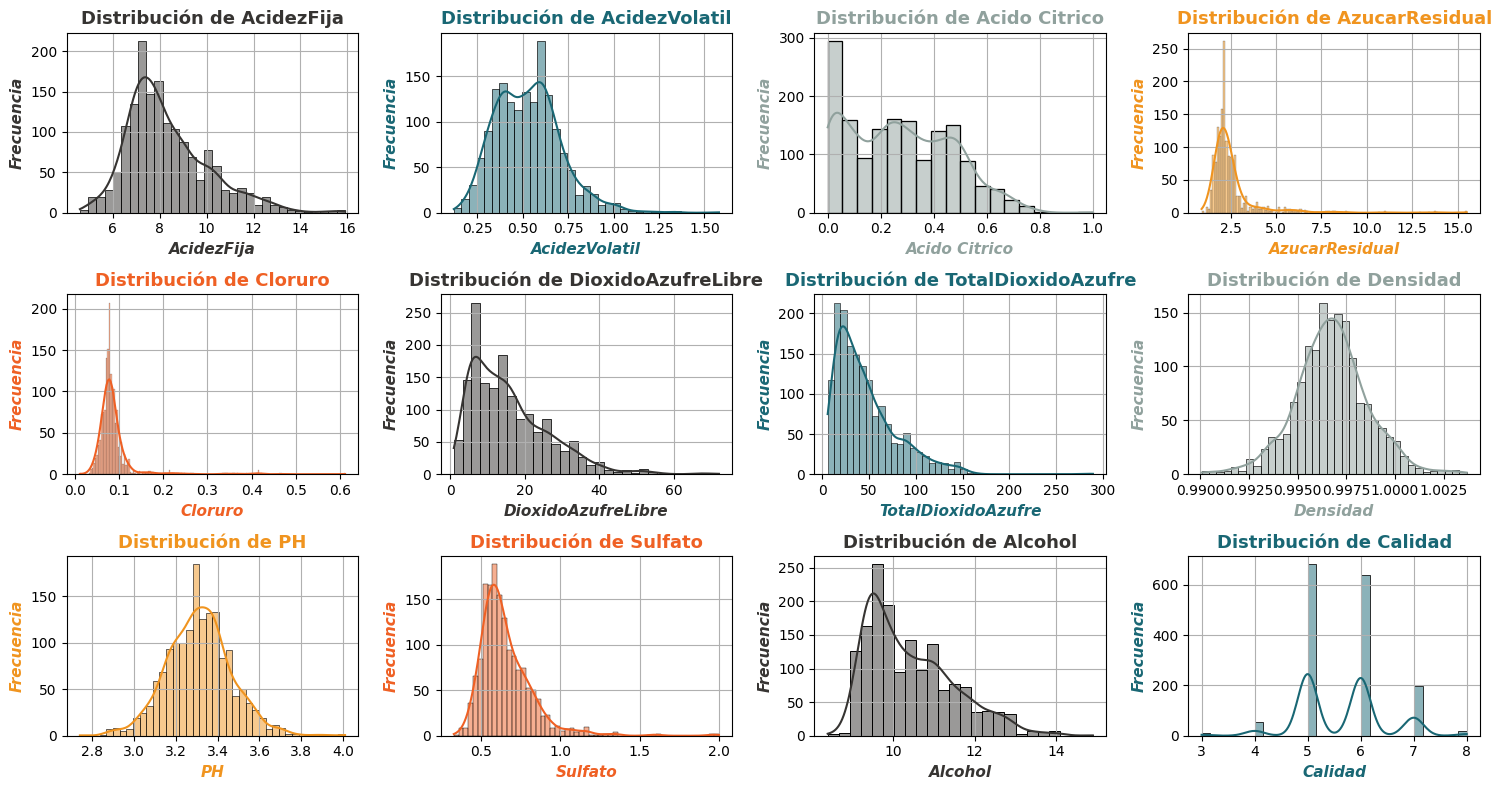

In [153]:
plt.figure(figsize=(15, 8))
c= 0
for i, column in enumerate(data.columns):
    if c > 4:
        c = 0
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[column], kde=True, color=colores[c])
    plt.title(f"Distribución de {column}", fontsize=13, color= colores[c], fontweight="bold")
    plt.xlabel(column, fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.ylabel("Frecuencia", fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.grid(True)
    c += 1

plt.tight_layout()
plt.show()

**Notas:**
- En cuanto a la acidez fija podemos observar una distribución sesgada levemente a la derecha, con mayor frecuencia de nivel de ácido tártarico en 7 gramos por litro.
- En cuanto a la acidez volátil podemos observar una distribución sesgada levemente a la derecha bimodal, con mayor frecuencia de nivel de ácido acético en 0.6 gramos por litro.
- Con respecto a los niveles de ácido cítrico podemos observar una distribución sesgada a la derecha con una meseta aplanada, con mayor frecuencia de nivel por debajo de los 0.05 gramos por litro.
- Con respecto a los niveles de ázucar residual podemos observar una distribución extremadamente sesgada a la derecha, con mayor frecuencia de niveles de ázucar de  2 gramos por litro.
- Con respecto a los niveles de cloruro podemos observar una distribución que podría considerarse normal de no ser porque está extremadamente sesgada a la derecha (posiblemente outliers), con mayor frecuencia de niveles de cloruro de  0.7 gramos por litro.
- Con respecto a los niveles de dióxido de azufre libre podemos observar una distribución sesgada a la derecha, con mayor frecuencia de niveles de dióxido de azufre que oscilan entre 8 y 10 ppm.
- Con respecto a los niveles totales de dióxido de azufre podemos observar una distribución sesgada a la derecha, con mayor frecuencia de niveles de dióxido de azufre que oscilan entre 15 y 25 ppm.
- Con respecto a los niveles de densidad del vino podemos observar una distribución que puede considerarse como normal, con mayor frecuencia de densidad entre 0.995 y 0.9975 gramos por centimetro cúbico.
- Con respecto a los niveles de pH podemos observar una distribución que puede considerarse ligeramente normal, con mayor frecuencia de niveles de pH entre 3.2 y 3.4 lo que significa que el vino presenta mayor acidez que alcalinidad.
- Con respecto a los niveles de Sulfato podemos observar una distribución sesgada a la derecha, con mayor frecuencia de niveles de sulfato entre 0.5 y 0.6 gramos por litro.
- Con respecto a los porcentajes de alcohol en la tabla de vinos observamos una distribución sesgada a la derecha multimodal, con mayor frecuencia de procentajes de alcohol entre el 8 y 10%.
- Con respecto a la calidad de los vinos observamos una distribución multimodal, con mayores frecuencias de calidad 5 y 6 puntos.

### **2.2.  Distribución de los datos: Boxplot**

A continuación generamos un lienzo con diagramas de caja para observar si existen valores atípicos, teniendo en cuenta los rangos intercuartilicos para determinar outliers.

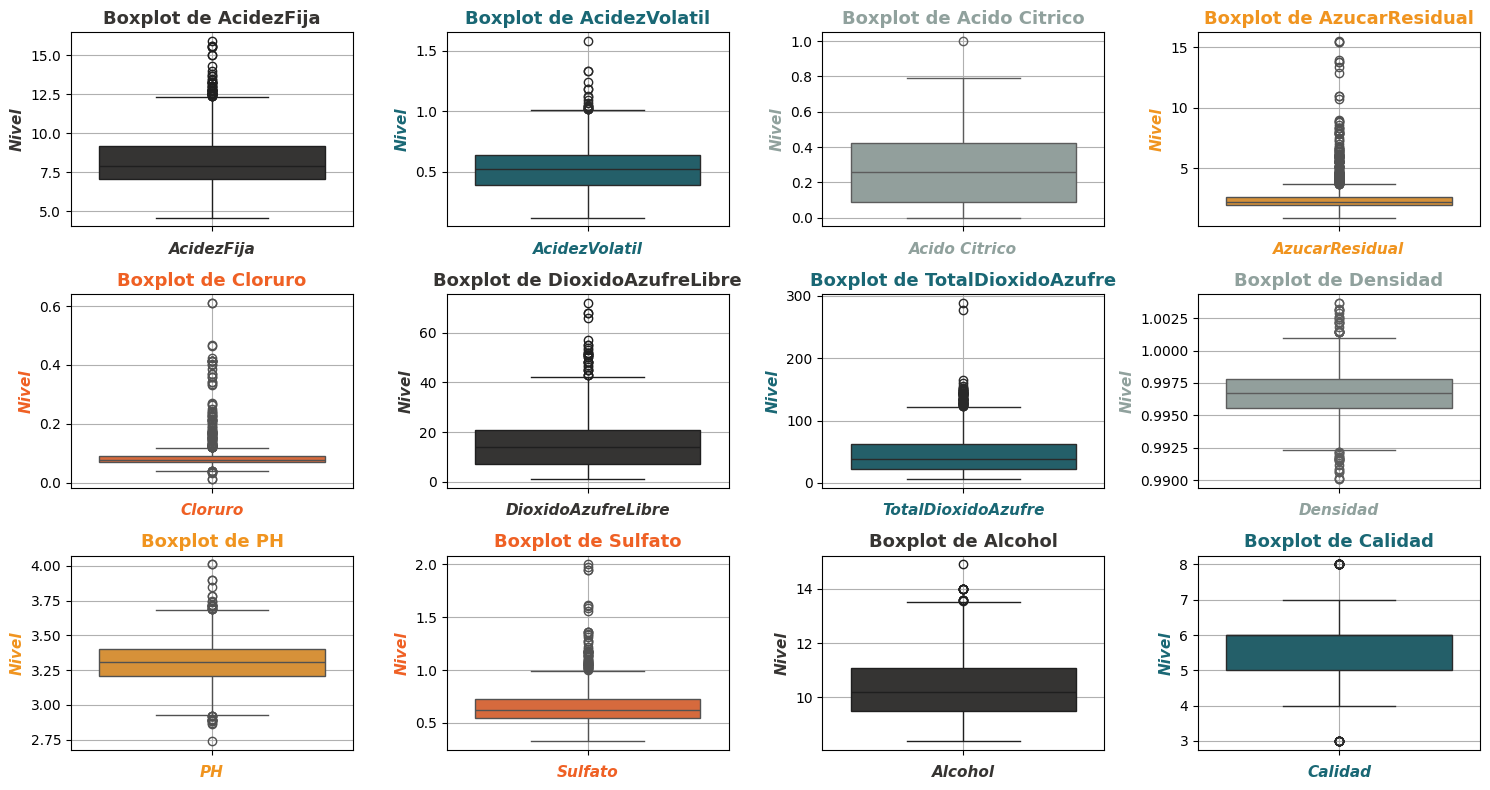

In [154]:
plt.figure(figsize=(15, 8))
c= 0
for i, column in enumerate(data.columns):
    if c > 4:
        c = 0
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data= data[column], color=colores[c])
    plt.title(f"Boxplot de {column}", fontsize=13, color= colores[c], fontweight="bold")
    plt.xlabel(column, fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.ylabel("Nivel", fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.grid(True)
    c += 1

plt.tight_layout()
plt.show()

**Notas:**
- En cuanto a la acidez fija podemos observar valores atípicos que se encuentran por encima de los 12.5 gramos por litro.
- En cuanto a la acidez volátil podemos observar valores atípicos que se encuentran por encima de 1.0 gramos por litro.
- Con respecto a los niveles de ácido cítrico podemos observar valores atípicos que se encuentran por encima de 0.8 gramos por litro.
- Con respecto a los niveles de ázucar residual podemos observar valores atípicos que se encuentran por encima de 4 gramos por litro.
- Con respecto a los niveles de cloruro podemos observar valores atípicos que se encuentran por encimoa 0.1 gramos por litro y por debajo de 0.05 gramos por litro.
- Con respecto a los niveles de dióxido de azufre libre podemos observar valores atípicos que se encuentran por encima de 40 ppm.
- Con respecto a los niveles totales de dióxido de azufre podemos observar valores atípicos que se encuentran por encima de 120 ppm.
- Con respecto a los niveles de densidad del vino podemos observar valores atípicos que se encuentran 1.0 gramos por centimetro cúbico y por debajo de 0.9925.
- Con respecto a los niveles de pH podemos observar valores alejados que se encuentran por encima de 3.7 y por debajo de 2.9.
- Con respecto a los niveles de Sulfato podemos observar valores alejados que se encuentran por encima de 1 gramo por litro.
- Con respecto a los porcentajes de alcohol en la tabla de vinos observamos valores alejados que se encuentran por encima de 13.5% de porcentaje de alcohol.
- Con respecto a la calidad de los vinos observamos valores alejados de la distribución de los datos por encima de 7 puntos y por debajo de 4 puntos.

## **3. Análisis de relaciones**
---
En esta sección haremos una revisión de las relaciones entre variables para determinar si una variable afecta a otras variables, para esto harémos gráficos y una matriz de correlación.

### **3.1.  Matriz de correlación**

Creamos una matriz de correlación que nos permita establecer el nivel de relación entre las variables.

In [155]:
# Creamos la matriz de correlación usando el método corr()
matrizCorrelacion = data.corr()
matrizCorrelacion

,AcidezFija,AcidezVolatil,Acido Citrico,AzucarResidual,Cloruro,DioxidoAzufreLibre,TotalDioxidoAzufre,Densidad,PH,Sulfato,Alcohol,Calidad
AcidezFija,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
AcidezVolatil,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Acido Citrico,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
AzucarResidual,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Cloruro,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
DioxidoAzufreLibre,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
TotalDioxidoAzufre,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Densidad,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
PH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Sulfato,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [156]:
coloresB = ["#8FC1B5", "#589A8D", "#007566", "#146551", "#265C4B"]

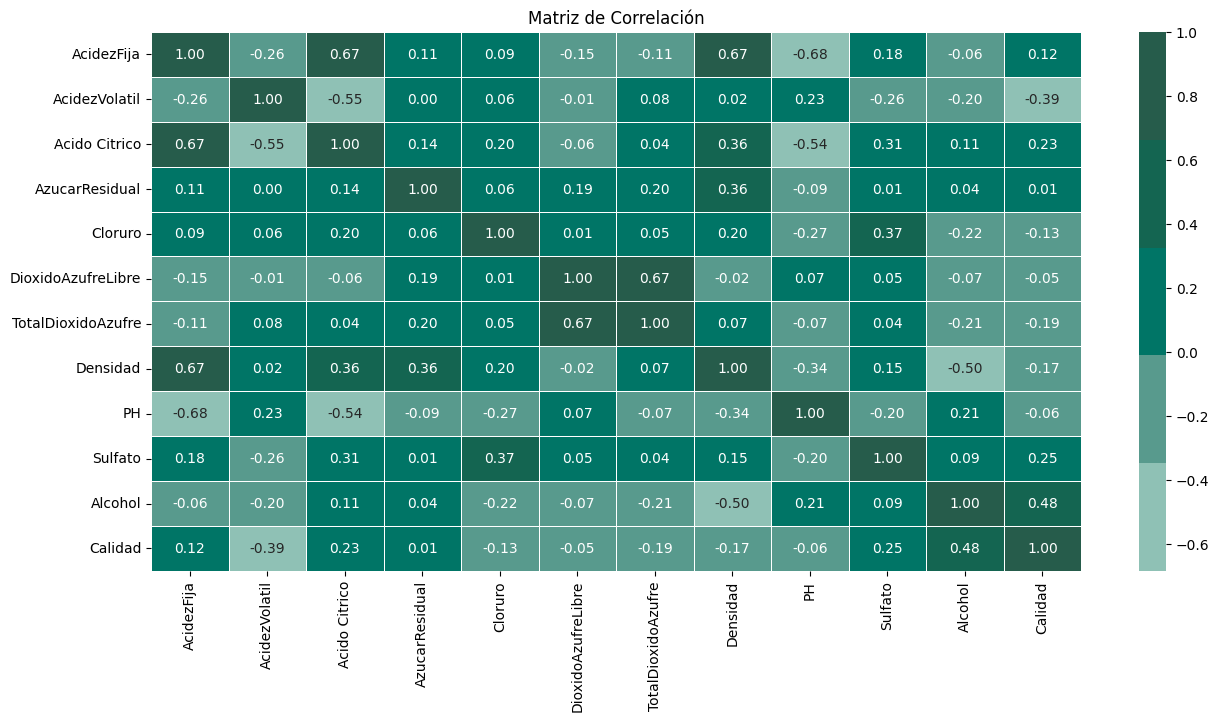

In [157]:
# Creamos un mapa de calor que nos permite identificar las relaciones entre los datos.
plt.figure(figsize=(15, 7))
sns.heatmap(matrizCorrelacion, annot=True, cmap=coloresB, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

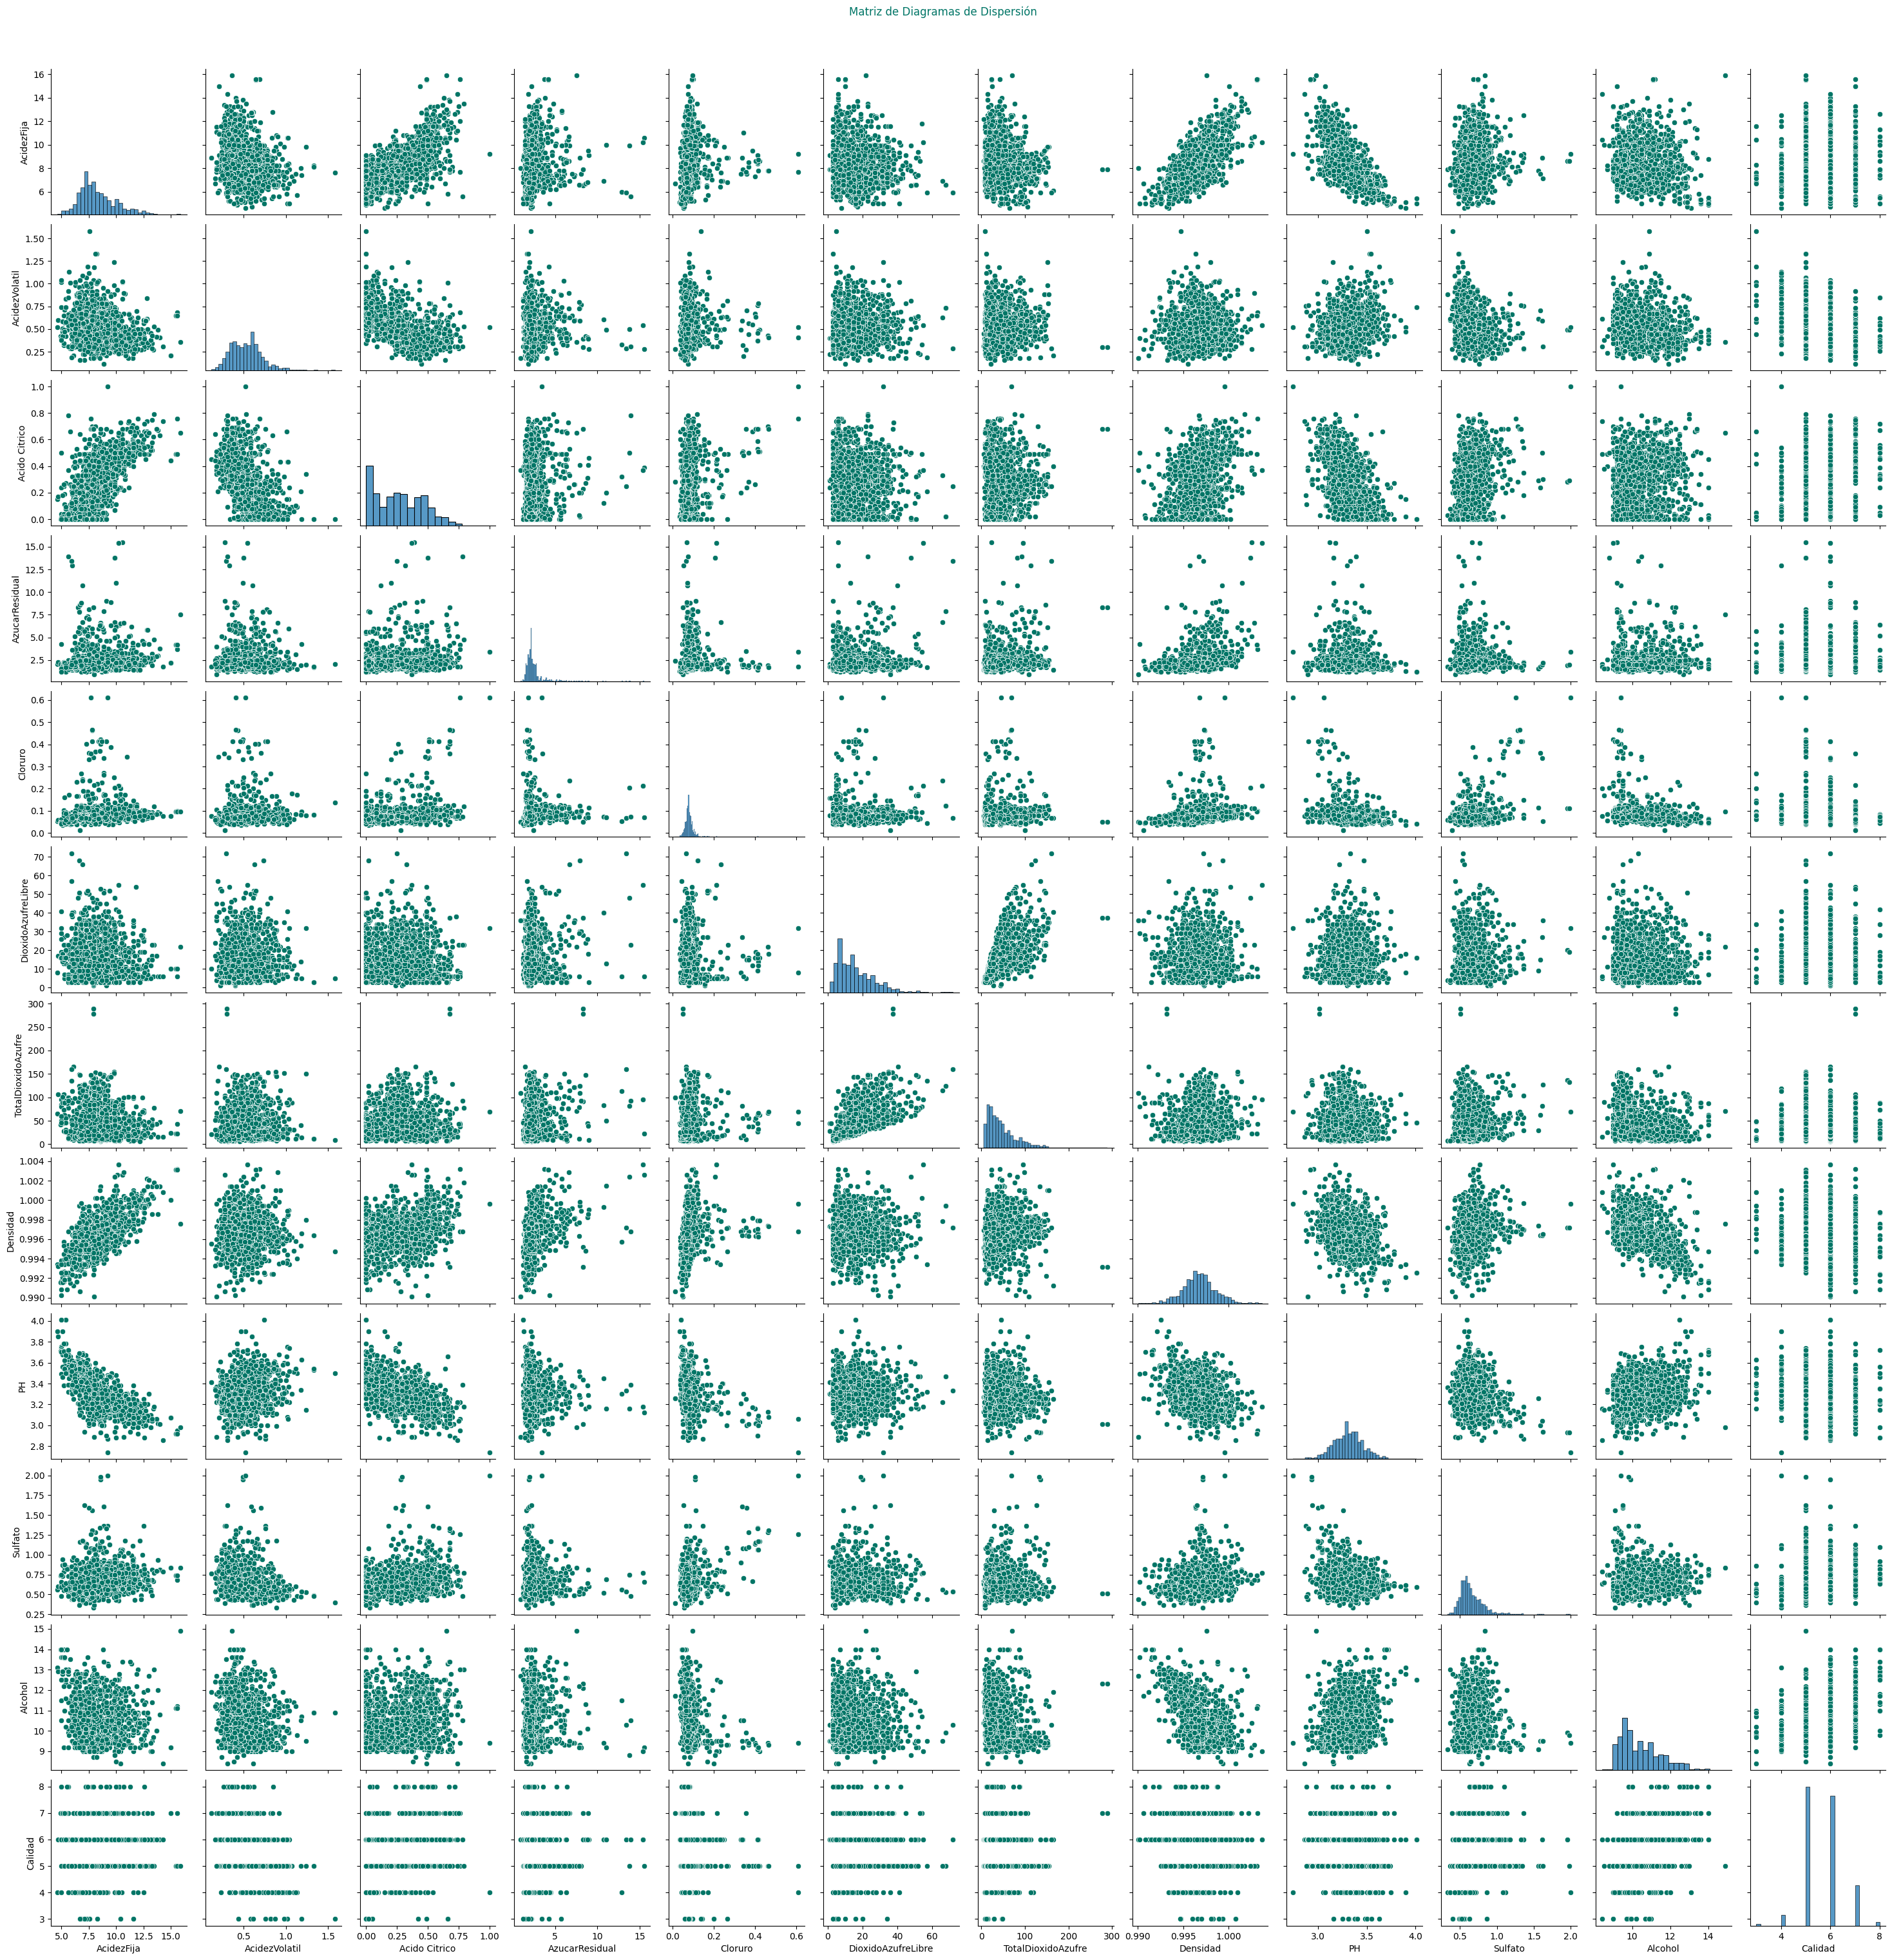

In [158]:
# Mostrar pairplot con título con color especificado
sns.pairplot(data, plot_kws={'color': coloresB[2]})
plt.suptitle('Matriz de Diagramas de Dispersión', color=coloresB[2], y=1.02)
plt.show()


**Notas:**
- Se puede observar que existe alta relación entre la acidez fija y el ácido cítrico lo que podría indicar que el ácido cítrico tiene relevancia en los niveles de acidez fija. También una alta relación entre la acidez fija y la densidad del vino.
- Se puede observar una relación inversa entre la acidez fija y el pH, a medida que una aumenta la otra disminuye.
- Con respecto a la variable calidad, que es nuestra variable de interes podemos observar que la caracteristicas como el nivel de alcohol y los niveles de sulfato tienen una relación positiva. Mientras que los niveles de acidez volátil tienen una relación negativa que es importante tenerla presente, ya que la calidad aumentaría si disminuyen los niveles de acidez volátil.

## **4. Modelo de regresión lineal**
---
El siguiente código implementa un análisis de regresión lineal. El propósito es realizar una estimación precisa de una variable objetivo a partir de un conjunto de características dadas.

### **4.1.  Separación variables predictoras y variable objetivo**

En primer lugar, el conjunto de datos se separa en características (denominadas X) y la variable objetivo (representada por y).

In [159]:
# Separamos las características (X) y la variable objetivo (y)
X = data.drop(columns=['Calidad'])
y = data['Calidad']

### **4.2.  División conjuntos de entrenamiento y prueba**

Dividimos los conjuntos de datos de entrenamiento y de prueba con el objetivo de evaluar la capacidad predictiva del modelo.

In [160]:
# Dividimos los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **4.3.  Preprocesamiento de datos**

Se realiza un proceso de estandarización usando el Standard Scaler que permite estandarizar características numéricas, transformando los datos para que tengan una media de 0 y una desviación estándar de 1. Con el fin de lograr lo siguiente:

- Reducir el dominio de ciertas características sobre otras.
- Mejor interpretación del modelo.

In [161]:
# Estandarizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **4.4.  Creación y entrenamiento del modelo**

Inicializamos el modelo y procedemos a entrenarlo usando el conjunto de datos de entrenamiento:

In [162]:
# Inicializamos el modelo de regresión lineal
modeloLineal = LinearRegression()

# Entrenamos el modelo
modeloLineal.fit(X_train_scaled, y_train)

LinearRegression()

### **4.5.  Poniendo a prueba el modelo y evualuándolo**

Usamos el modelo anteriormente entrenado a predecir la variable objetivo y realizamos la evaluación del modelo mediante dos métricas fundamentales para evaluar el rendimiento del modelo y comprender la capacidad predictiva del modelo de regresión:

- Error Cuadrático Medio (MSE): Indica la dispersión de las predicciones con respecto a los valores reales.
- Coeficiente de determinación (R2): Representa la proporción de la variación en la variable dependiente.

In [163]:

# Predecir la variable objetivo en el conjunto de prueba
y_pred = modeloLineal.predict(X_test_scaled)

# Calcular el error cuadrático medio y R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio:", mse)
print("R^2:", r2)

Error cuadrático medio: 0.39002514396395493
R^2: 0.4031803412796219


**Notas:**
- El error cuadrático medio (MSE) es de: **0.39**, lo que indica que en promedio las predicciones del modelo tienen un error o diferencia de 0.39 unidades al cuadrado con respeto al valor real. Si bien el valor ideal sería cercano al 0, tiene una capacidad moderada de predicción.

- El coeficiente de determinación (R2) es de **0.40**, lo que indica que el modelo solo puede explicar el 40% de la variabilidad en las características físico-químicas utilizadas en el modelo.

- Si bien estos resultados indican una capacidad moderada del modelo para explicar la variabilidad en la calidad del vino, también señalan que aún existe margen para mejorar la precisión del modelo, posiblemente considerando la inclusión de más características o la exploración de modelos más complejos.

### **4.5.  Usando técnicas de regularización**

Vamos a aplicar regularización para ver si podemos mejorar el rendimiento del modelo. Para esto existen dos técnicas principales de regularización: Ridge(L2) y Lasso(L1).

#### **4.5.1  Ridge**

Aplicamos Ridge con un alpha de 1.0 y volvemos a entrenar el modelo.

In [164]:
modeloRidge = Ridge(alpha=1.0)
modeloRidge.fit(X_train_scaled, y_train)
y_pred_ridge = modeloRidge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Modelo Ridge:")
print("Error cuadrático medio:", mse_ridge)
print("R^2:", r2_ridge)

Modelo Ridge:
Error cuadrático medio: 0.3900380059146077
R^2: 0.4031606598177524


**Notas:**
- Obteniendo estos resultados podemos determinar que la regularización de Ridge no ha tenido impacto en la precisión del modelo, ni en la capacidad de explicar la variabilidad en la calidad del vino, así como en las predicciones.

- Esto sugiere que el modelo de regresión lineal sin regularización ya estaba lo suficientemente ajustado.

#### **4.5.2  Lasso**

Aplicamos Lasso con un alpha de 0.01 y volvemos a entrenar el modelo.

A continuacion aplicaremos Lasso (L1)

In [165]:
modeloLasso = Lasso(alpha=0.01)
modeloLasso.fit(X_train_scaled, y_train)
y_pred_lasso = modeloLasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Modelo Lasso")
print("Error cuadrático medio:", mse_lasso)
print("R^2:", r2_lasso)

Modelo Lasso
Error cuadrático medio: 0.39301501591123317
R^2: 0.39860521482224376


**Notas:**
- Obteniendo estos resultados podemos determinar que la regularización de Lasso no ha tenido impacto significativo en la precisión del modelo, ni en la capacidad de explicar la variabilidad en la calidad del vino, así como en las predicciones.

- Esto sugiere que el modelo de regresión lineal sin regularización ya estaba lo suficientemente ajustado.

### **4.6.  Usando el modelo de regresión lineal de Stats**

Dado que la aplicacion de regularizacion, no proporciono cambios significativos para mejorar el modelo vamos a utilizar esta fórmula para ajustar un modelo de regresión lineal. Generamos un resumen del modelo que nos permite interpretar la importancia relativa de cada característica en la determinación de la calidad del vino y evaluar la calidad del ajuste del modelo en términos de la cantidad de variabilidad en la calidad del vino que puede ser explicada por estas características.

In [166]:
# Separamos las características (X) y la variable objetivo (y)
X = data.drop(columns=['Calidad'])
y = data['Calidad']

# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos X_scaled de nuevo a un DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Agregamos una columna constante para el intercepto
X_train_sm = add_constant(X_train)

# Creamos el modelo de regresión lineal con todas las características
modeloSM = OLS(y_train, X_train_sm)

# Ajustamos el modelo
resultados = modeloSM.fit()

# Imprimimos un resumen del modelo
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                Calidad   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     61.48
Date:                Sat, 04 May 2024   Prob (F-statistic):          1.48e-109
Time:                        21:22:24   Log-Likelihood:                -1266.4
No. Observations:                1279   AIC:                             2557.
Df Residuals:                    1267   BIC:                             2619.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.6294      0

### **4.7.  Usando el método de selección de características**

Para mejorar el modelo de regresión, se aplicó un método de selección de características para identificar las variables más relevantes en la predicción de la calidad del vino. Se seleccionaron las características 'AcidezVolatil', 'Cloruro', 'Sulfato' y 'Alcohol' del conjunto de datos original. Estas características fueron elegidas en función de su relevancia teórica y su correlación con la variable objetivo. 

Posteriormente, se ajustó un modelo de regresión lineal utilizando estas características seleccionadas. Esta estrategia de selección de características permite simplificar el modelo y mejorar su interpretabilidad, al mismo tiempo que mantiene un buen rendimiento predictivo. Los resultados obtenidos proporcionan información sobre la influencia relativa de cada variable en la calidad del vino, lo que puede ser útil para comprender mejor los factores que contribuyen a dicha calidad.

In [167]:
data.columns

Index(['AcidezFija', 'AcidezVolatil', 'Acido Citrico', 'AzucarResidual',
       'Cloruro', 'DioxidoAzufreLibre', 'TotalDioxidoAzufre', 'Densidad', 'PH',
       'Sulfato', 'Alcohol', 'Calidad'],
      dtype='object')

In [168]:
# Variables predictoras
X = data[["AcidezVolatil", "Cloruro", "Sulfato", "Alcohol"]]
X = add_constant(X)

# Variable objetivo
y = data["Calidad"]

# Creamos el modelo de regresión lineal
modeloRFinal = OLS(y, X)

# Ajustar el modelo
resultado2 = modeloRFinal.fit()

# Imprimir el resumen del modelo
print(resultado2.summary())

# Hacer predicciones
predictions = resultado2.predict(X)

                            OLS Regression Results                            
Dep. Variable:                Calidad   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     208.1
Date:                Sat, 04 May 2024   Prob (F-statistic):          9.83e-144
Time:                        21:22:24   Log-Likelihood:                -1590.7
No. Observations:                1599   AIC:                             3191.
Df Residuals:                    1594   BIC:                             3218.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7768      0.199     13.975

**Notas:**
- Este modelo final incluye solo las características que mayor relación podrían tener con la variable objetivo, lo que ha demostrado ser significativo y explicar aproximadamente el 34.3% de la cariabilidad en la calidad del vino.

- El estadístico F y los coeficientes sugieren que todas las variables seleccionadas tienen una influencia significativa en la calidad del vino.

- Estos hallazgos respaldan la efectividad del enfoque de selección de características aplicado, simplificando el modelo y mejorando la interpretabilidad sin comprometer su capacidad predictiva.

### **4.8.  Conclusiones**

*Después de evaluar varios modelos de regresión para predecir la calidad del vino, incluyendo la Regresión Lineal sin ajustar, la Regresión Lineal ajustada, la Regresión Ridge y la Regresión LASSO, concluimos que el mejor modelo a elegir es la Regresión Ridge. Este modelo ofrece un equilibrio óptimo entre precisión predictiva e interpretabilidad. Al comparar el error cuadrático medio (MSE) y el coeficiente de determinación (R²) entre los modelos, observamos que la Regresión Ridge presenta un MSE ligeramente más bajo y un R² comparable al de la Regresión Lineal ajustada, mientras que supera en rendimiento a la Regresión LASSO. Además, la Regresión Ridge aborda de manera efectiva la multicolinealidad entre las variables predictoras al agregar una penalización en la magnitud de los coeficientes, lo que mejora la estabilidad del modelo y reduce el riesgo de sobreajuste. Esta elección se alinea con nuestros objetivos de obtener un modelo.*

## **5. Modelo de regresión logística**
---
El siguiente código implementa un análisis de regresión logística. El propósito es realizar una estimación precisa de una variable objetivo a partir de un conjunto de características dadas.

### **5.1.  Separación variables predictoras y variable objetivo creando una copia de los datos**

En primer lugar, creamos una copia de los datos y creamos la variable CalidadCat y verificamos los primeros 5 registros para asegurarnos que se haya creado correctamente el conjunto de datos y separando en características (denominadas X) y la variable objetivo (representada por y).

In [169]:
# Creamos una copia de la base de datos
data2 = data.copy()

# Creamos la variable CalidadCat teniendo en cuenta la variable Calidad
data2["CalidadCat"] = data2["Calidad"].apply(lambda x: "Bueno" if x >= 6 else "Regular")
print(data2[["Calidad", "CalidadCat"]].head())

# Separamos la variable objetivo  y las características
X = data2.drop(["Calidad", "CalidadCat"], axis=1)
y = data2['CalidadCat']

# Dividimos los datos en conjuntos de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Calidad CalidadCat
0        5    Regular
1        5    Regular
2        5    Regular
3        6      Bueno
4        5    Regular


### **5.2.  Preprocesamiento de datos**

Se realiza un proceso de estandarización usando el Standard Scaler que permite estandarizar características numéricas, transformando los datos para que tengan una media de 0 y una desviación estándar de 1. Con el fin de lograr lo siguiente:

- Reducir el dominio de ciertas características sobre otras.
- Mejor interpretación del modelo.

In [170]:
# Estandarizar los conjuntos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **5.3.  Creación y entrenamiento del modelo**

Inicializamos el modelo y procedemos a entrenarlo usando el conjunto de datos de entrenamiento:

In [171]:
# Inicializamos el modelo de regresión logística
modeloLog = LogisticRegression(max_iter=1000)

# Entrenamos el modelo utilizando los datos de entrenamiento escalados
modeloLog.fit(X_train_scaled, y_train)

train_score = modeloLog.score(X_train_scaled, y_train)
test_score = modeloLog.score(X_test_scaled, y_test)

print("Precisión en el conjunto de entrenamiento:", train_score)
print("Precisión en el conjunto de prueba:", test_score)

Precisión en el conjunto de entrenamiento: 0.7521501172791243
Precisión en el conjunto de prueba: 0.740625


### **5.4.  Poniendo a prueba el modelo y evualuándolo**

Usamos el modelo anteriormente entrenado a predecir la variable objetivo y realizamos la evaluación del modelo usando la matriz de confusión que nos permite determinar los aciertos y fallos del modelo.

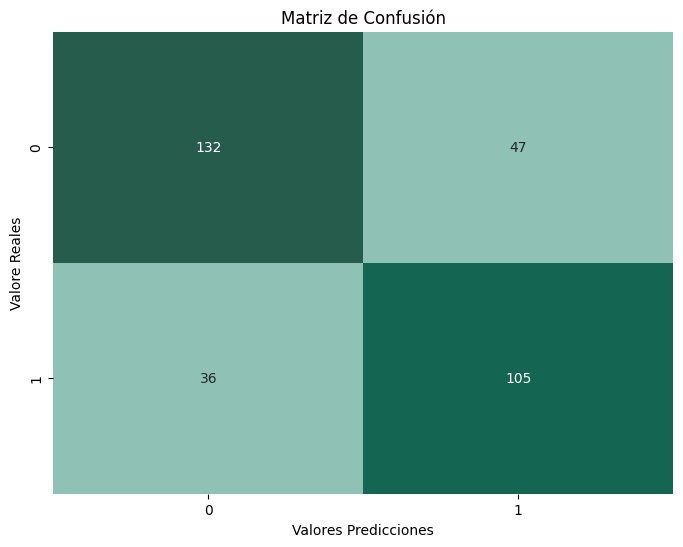

In [172]:
# Predecir las etiquetas para los datos de prueba
y_pred = modeloLog.predict(X_test_scaled)

# Calculamos la matriz de confusión
matrizConf = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matrizConf, annot=True, fmt="d", cmap=coloresB, cbar=False)
plt.xlabel('Valores Predicciones')
plt.ylabel('Valore Reales')
plt.title('Matriz de Confusión')
plt.show()

**Notas:**
- El rendimiento del modelo es significativo en la clasificación de los vinos como "Bueno" y "Regular", ya que tiene en su mayoría aciertos tanto de derdaderos positivos como de verdaderos negativos.

- El modelo comete un número notable de errores, especialmente en la clasificación. Los errores si bien no superan a los aciertos, hay un número considerable de falsos positivos.

### **5.5.  Evaluando el rendimiento con la curva ROC**

A continuación calculamos y graficamos la curva ROC para evaluar el rendimiento del modelo de regresión logística, proporcionando una medida de la bondad del modelo.

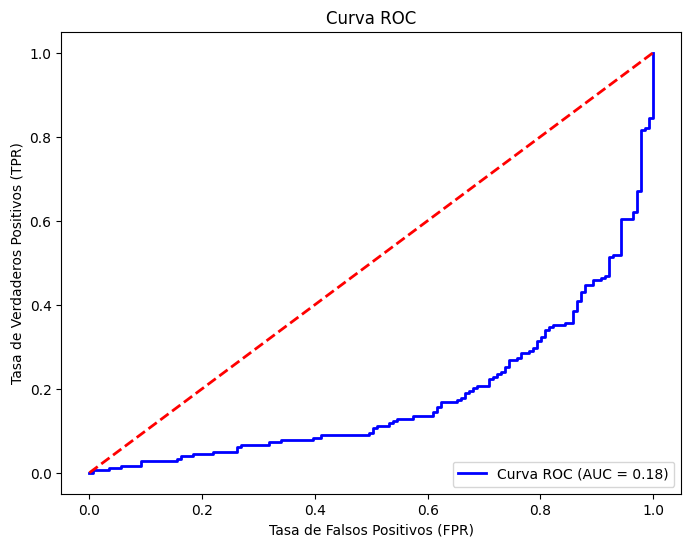

In [173]:
# Obtenemos las probabilidades de predicción para la clase positiva ('Bueno')
y_pred_proba = modeloLog.predict_proba(X_test_scaled)[:, 1]

# Calculamos la tasa de verdaderos positivos (TPR), la tasa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label="Bueno")

# Calculamos el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Generamos todas las matricas de desempleño

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bueno       0.79      0.74      0.76       179
     Regular       0.69      0.74      0.72       141

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



**Notas:**
- El modelo parece tener un rendimiento razonablemente bueno, con valores consistentes de precisión, recall y F1-score para ambas clases.

### **5.6.  Usando técnicas de regularización**

Vamos a aplicar regularización para ver si podemos mejorar el rendimiento del modelo. Para esto existen dos técnicas principales de regularización: Ridge(L2) y Lasso(L1).

In [175]:
# Inicializamos y entrenaos el modelo de regresión logística con regularización Ridge (L2)
modeloRidgeLog = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
modeloRidgeLog.fit(X_train_scaled, y_train)

# Inicializar y entrenar el modelo de regresión logística con regularización Lasso (L1)
modeloLassoLog = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)
modeloLassoLog.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [176]:
# Precisión en el conjunto de entrenamiento
train_accuracy_ridge = modeloRidgeLog.score(X_train_scaled, y_train)
print("Precisión en el conjunto de entrenamiento (Ridge):", train_accuracy_ridge)

train_accuracy_lasso = modeloLassoLog.score(X_train_scaled, y_train)
print("Precisión en el conjunto de entrenamiento (Lasso):", train_accuracy_lasso)

# Precisión en el conjunto de prueba
test_accuracy_ridge = modeloRidgeLog.score(X_test_scaled, y_test)
print("Precisión en el conjunto de prueba (Ridge):", test_accuracy_ridge)

test_accuracy_lasso = modeloLassoLog.score(X_test_scaled, y_test)
print("Precisión en el conjunto de prueba (Lasso):", test_accuracy_lasso)

Precisión en el conjunto de entrenamiento (Ridge): 0.7521501172791243
Precisión en el conjunto de entrenamiento (Lasso): 0.7505863956215794
Precisión en el conjunto de prueba (Ridge): 0.740625
Precisión en el conjunto de prueba (Lasso): 0.7375


### **5.7.  Conclusiones**

*El modelo de regresión logística aplicado al conjunto de datos de vinos ha demostrado ser efectivo en la clasificación de vinos en las categorías "buenos" y "regulares", con una precisión general del 74.06%, el modelo logra predecir correctamente la calidad de los vinos en la mayoría de los casos.* 

*La evaluación detallada del modelo a través del reporte de clasificación revela que alcanza altos niveles de precisión y recall para ambas clases, aunque con ligeras variaciones entre ellas.* 

*La matriz de confusión proporciona una visión adicional sobre las predicciones correctas e incorrectas del modelo, lo que permite una comprensión más completa de su rendimiento. En general, el modelo de regresión logística representa una herramienta valiosa para la clasificación de vinos basada en sus características químicas, brindando información útil para productores y consumidores en la industria vitivinícola.*

*Es importante mencionar que el modelo puede mejorar, ya que su precisión debería estar alrededor del 85% y 90% para considerarse un modelo más efectivo*

## **6. Conclusiones finales**
---
- Para determinar cuál es mejor, necesitamos considerar las métricas de evaluación específicas de cada tipo de modelo y cómo se relacionan con el problema que estamos tratando de resolver que es predecir la calidad del vino, por lo que la métrica clave será cómo se ajustan las predicciones a la realidad.

- Para el modelo de regresión lineal, calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R^2). Un MSE más bajo y un R^2 más alto indican un mejor ajuste del modelo a los datos. Para el modelo de regresión logística, utilizamos la precisión, que es la proporción de predicciones correctas sobre el total de predicciones realizadas. Una precisión más alta indica un mejor rendimiento del modelo. Basándonos en los obtenidos:

- Para el modelo de regresión lineal, obtuvimos un MSE de 0.390 y un R^2 de 0.403. Para el modelo de regresión logística, obtuvimos una precisión de alrededor del 74%. Comparando estas métricas, podemos ver que el modelo de regresión logística tiene una precisión más alta en comparación con el modelo de regresión lineal.

- Si necesitamos evaluar la calidad de las variedades rojas del vino portugués "Vinho Verde" según características físico-químicas, el mejor modelo a escoger sería la Regresión Logística. Este modelo nos permite clasificar las muestras de vino en las categorías "buenos" y "regulares" según sus características químicas, lo que es especialmente útil para este propósito. La Regresión Logística proporciona una precisión del 74.06% en la clasificación de vinos, lo que sugiere que es capaz de predecir con precisión la calidad de las variedades rojas de "Vinho Verde" en la mayoría de los casos. Además, su capacidad para proporcionar métricas detalladas como la precisión, el recall y el F1-score permite una evaluación exhaustiva del rendimiento del modelo, lo que brinda confianza en su capacidad para realizar predicciones precisas sobre la calidad del vino.

- Es importante mencionar que la predicción podría mejorar si existiesen variables con mayor relación a la calidad del vino, ya que se identificó en la matriz de correlaciones que no existen valores de correlación muy significativos que puedan ayudar a la predicción del modelo. Al menos con valores de correlación por encima del 70%, lo que mejoraría el rendimiento del modelo de regresión lineal.